# Classification of Heart Disease Data Set

### Importing libraries

In [92]:
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import chi2, chi2_contingency, mannwhitneyu, pearsonr, shapiro
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import statsmodels.stats.proportion as smp

### Loading the dataset

In [4]:
df = pd.read_csv('C:\\heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [15]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [19]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

### Data Analysis and Visualization

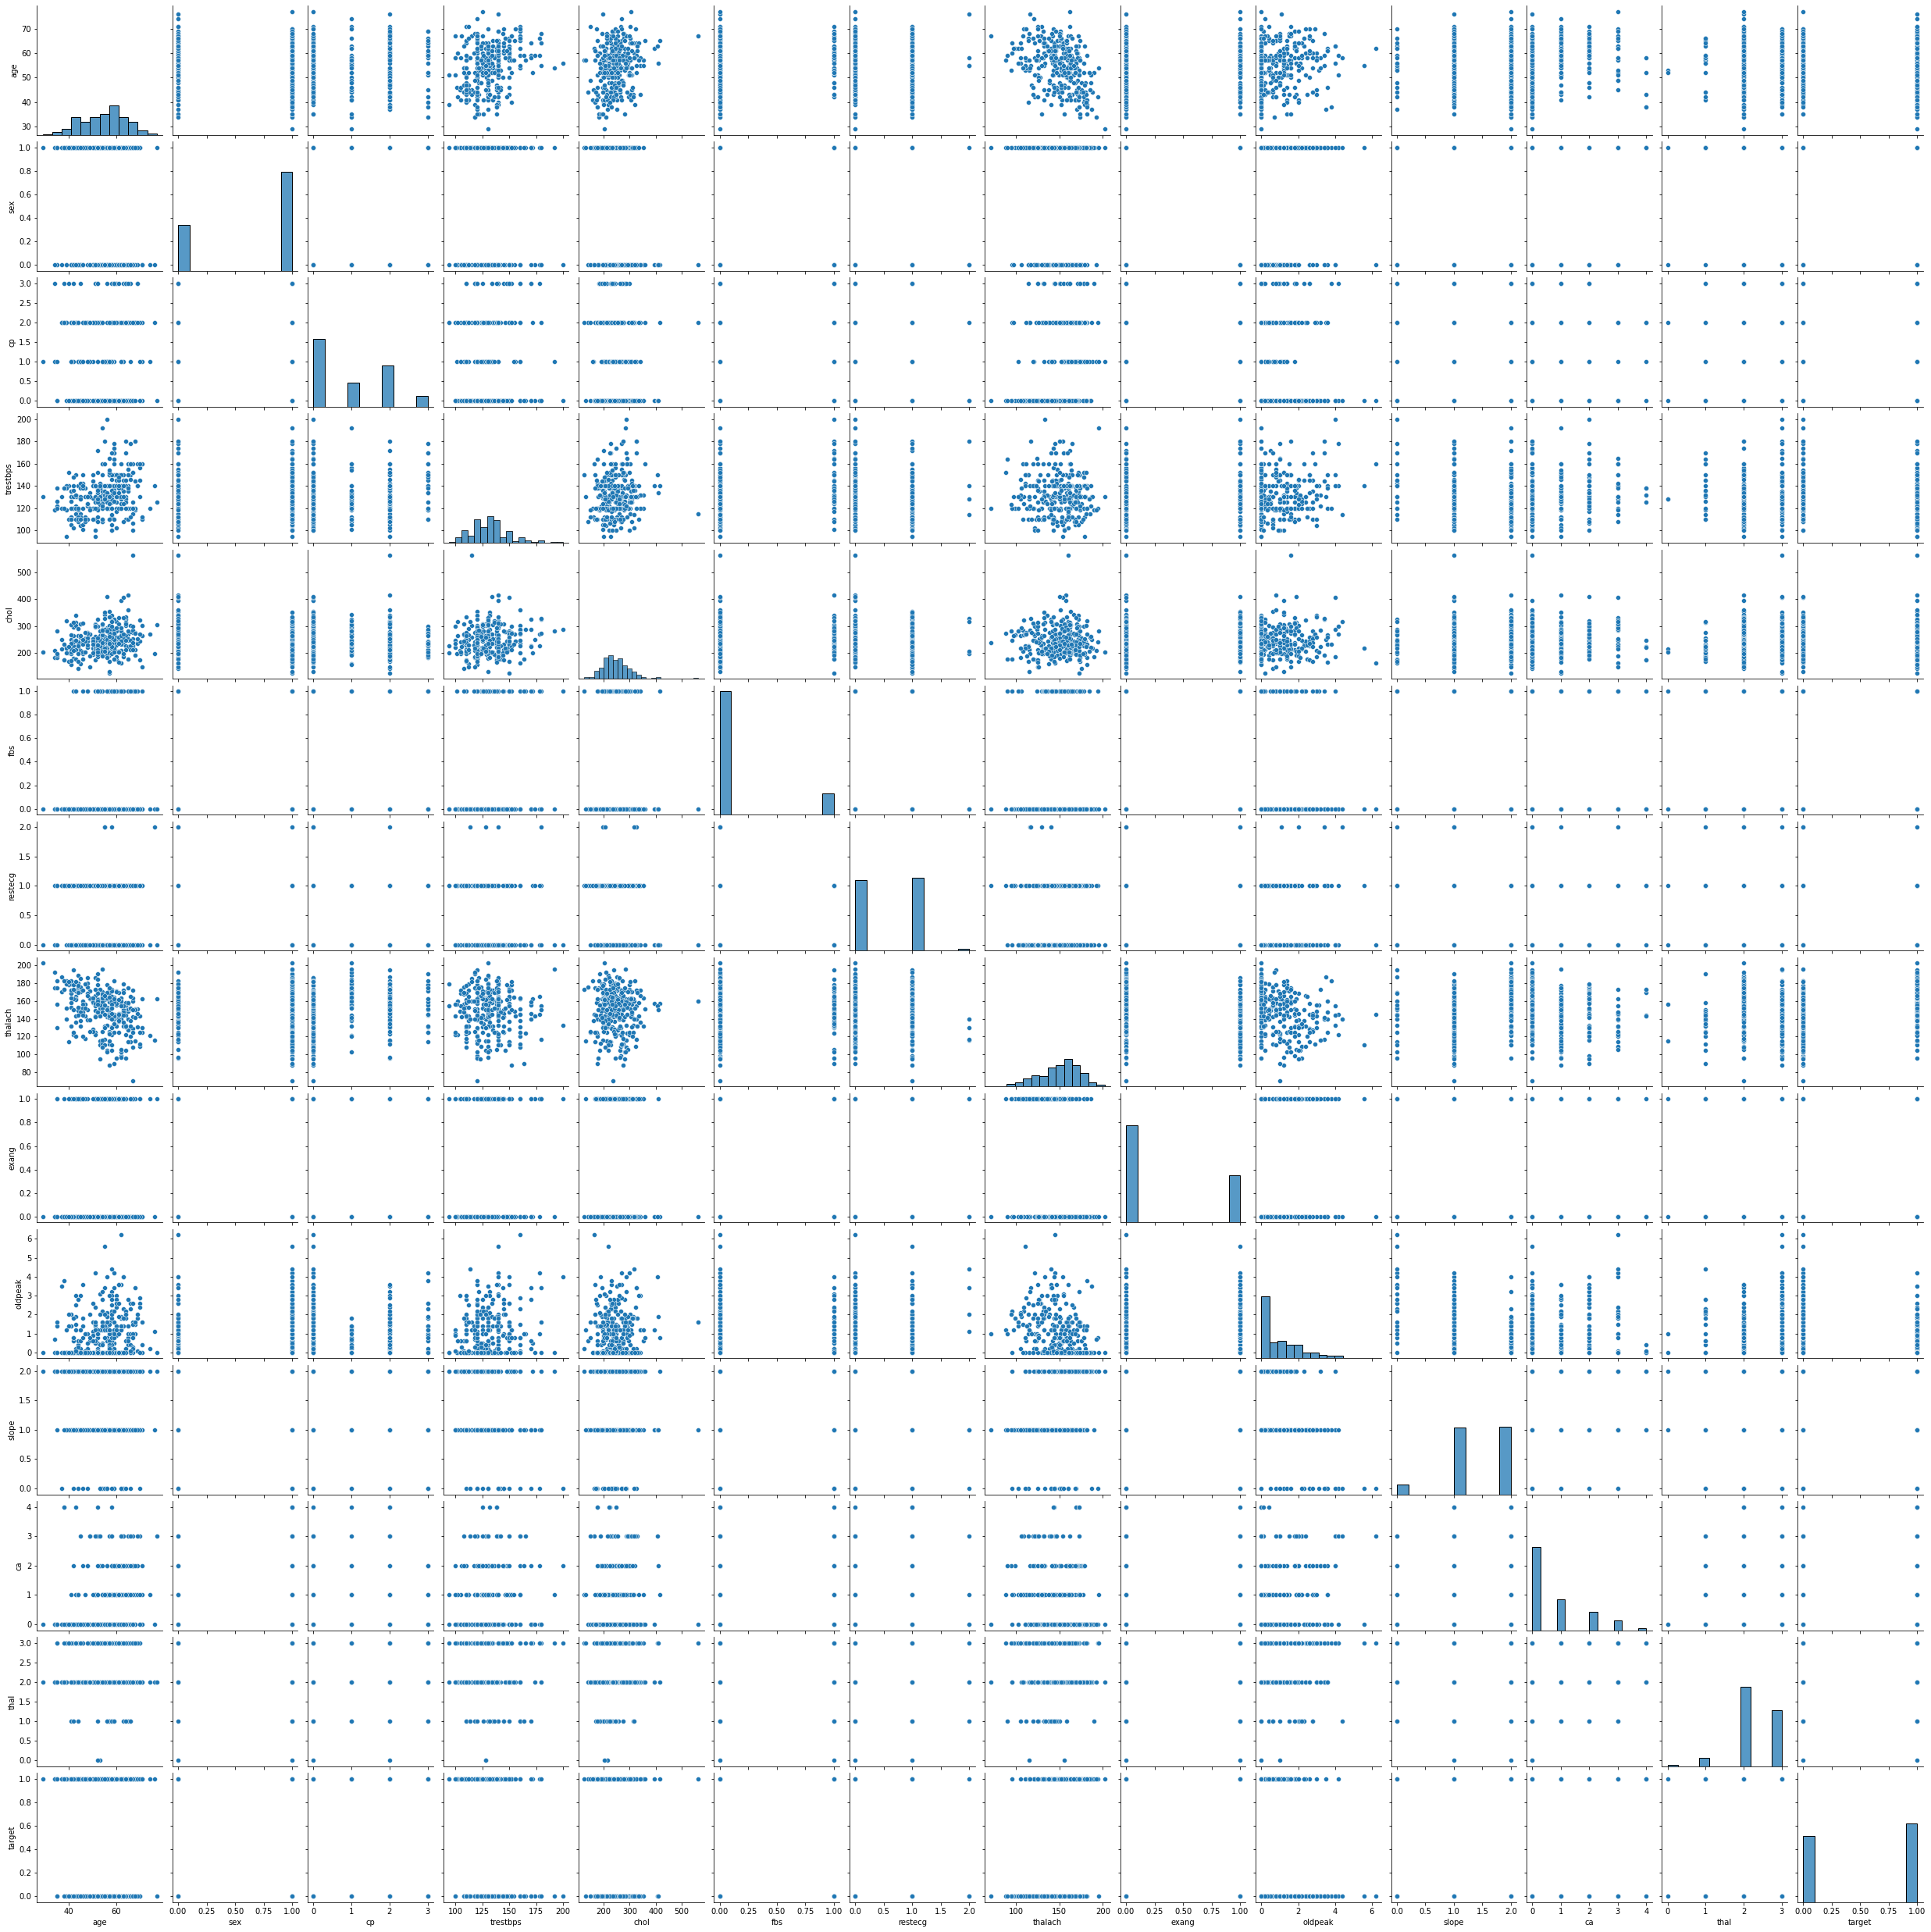

In [20]:
sns.pairplot(df)

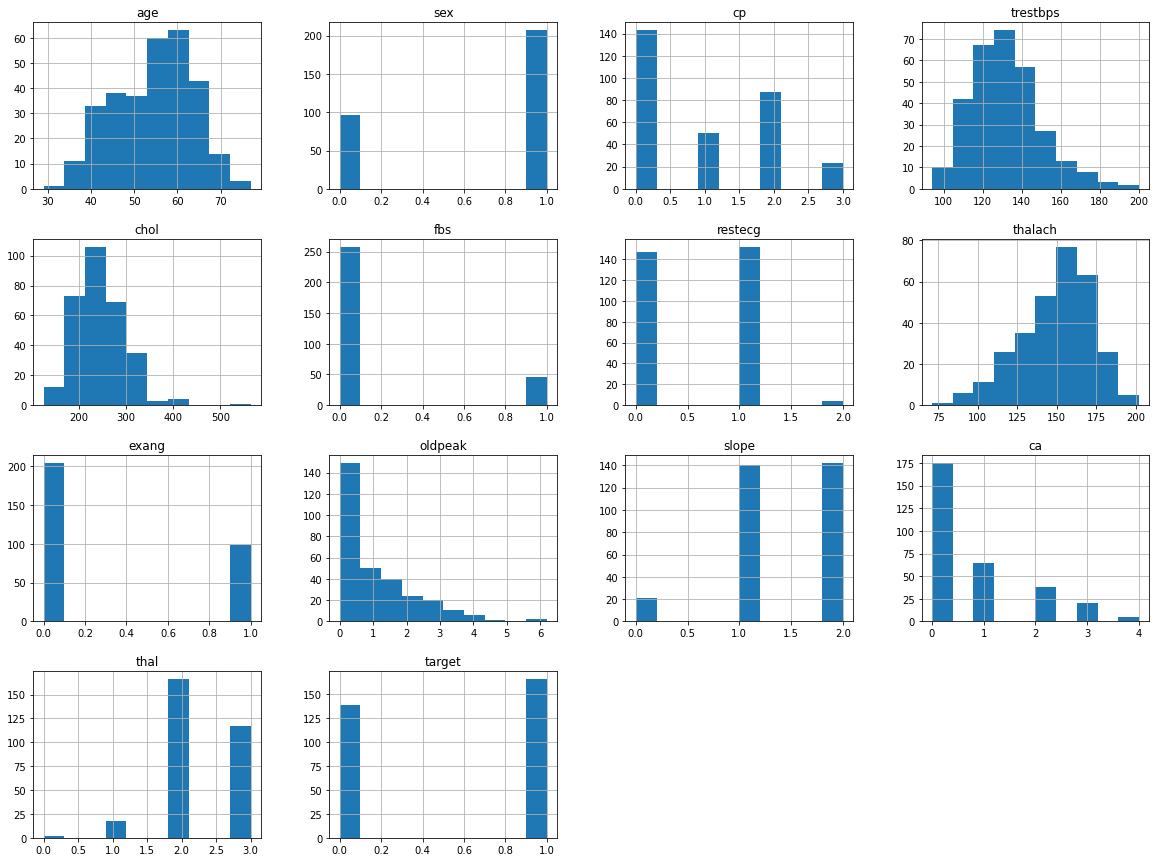

In [22]:
df.hist(figsize=(20,15))
plt.show()

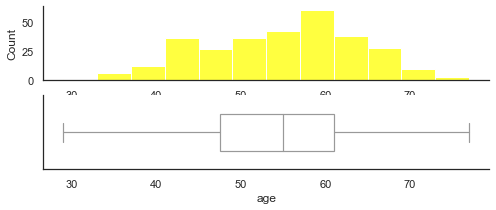

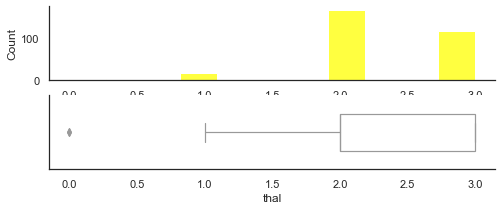

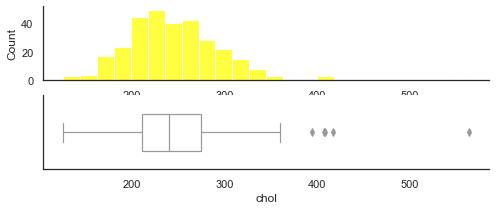

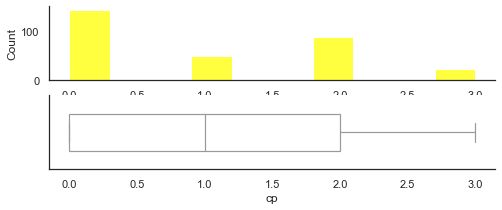

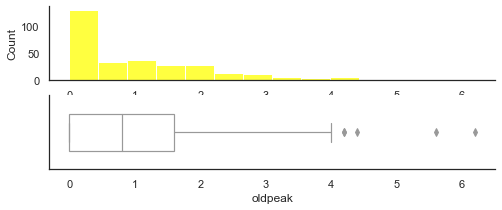

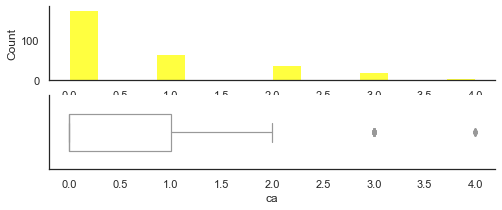

In [40]:
metric_vars = ["age", "thal", "chol", "cp", "oldpeak", "ca"]
for var in metric_vars:
    sns.set_palette(sns.color_palette(['yellow']))
    f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,3))
    sns.histplot(x=df[var], ax=axes[0])
    sns.set(style='white')
    sns.boxplot(x=df[var], color='white', width=0.5, linewidth=1.2)
    sns.despine()

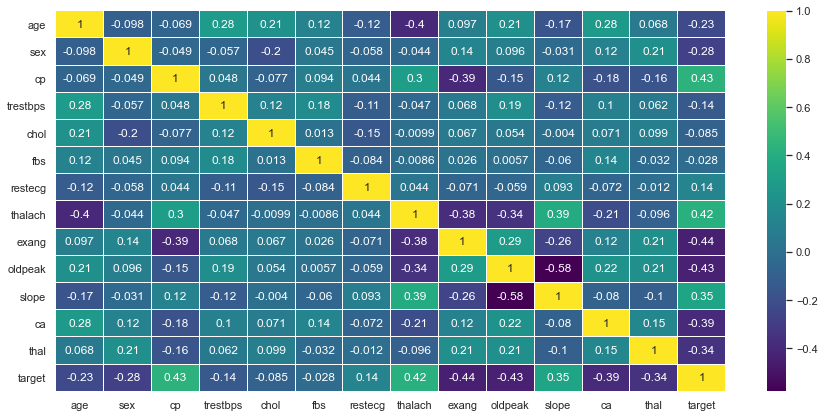

In [49]:
corr_matrix = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, linewidths=.01, annot = True, cmap='viridis')
plt.show()

([<matplotlib.patches.Wedge at 0x2268372d280>,
 [Text(0.4169972215783146, 1.017896515956296, 'Males_survived'),
  Text(-1.0808987652871846, -0.2041025702940552, 'Male_does_not_survived'),
  Text(-0.18726788140148623, -1.0839422219820571, 'Female_survived'),
  Text(0.8074644079489767, -0.7469947991088083, 'Female_does_not_survived')])

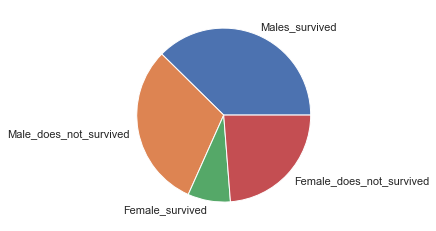

In [53]:
male_sur = df[df.sex==1]
female_sur = df[df.sex==0]
values= [len(male_sur[male_sur.target==0]), len(male_sur[male_sur.target==1]), len(female_sur[female_sur.target==0]),
        len(female_sur[female_sur.target==1])]
names= ["Males_survived", "Male_does_not_survived","Female_survived","Female_does_not_survived"]

plt.pie(values, labels=names)

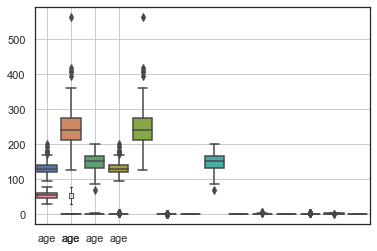

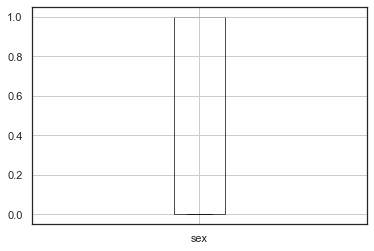

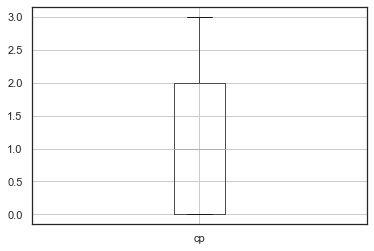

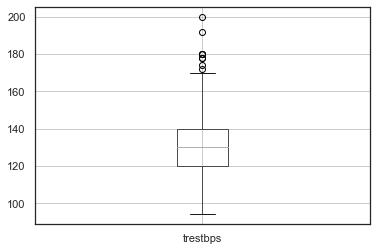

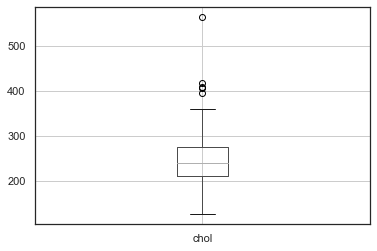

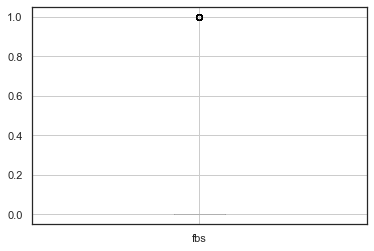

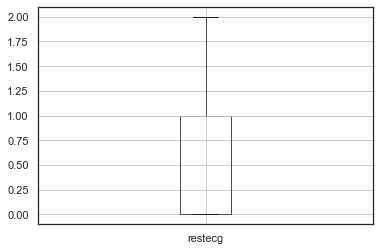

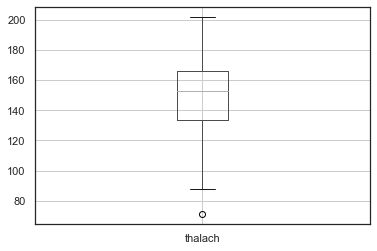

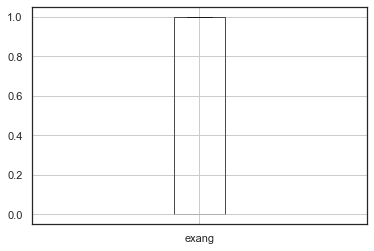

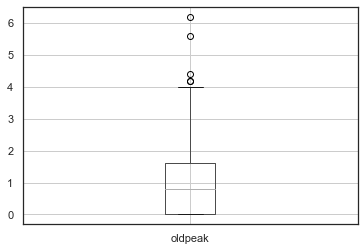

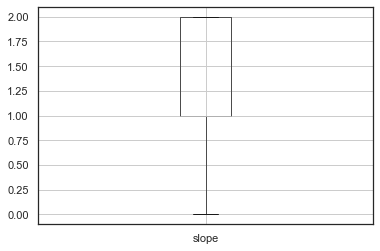

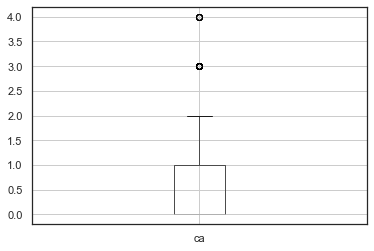

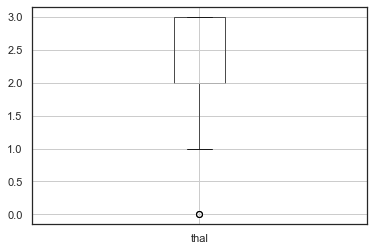

In [54]:
sns.boxplot(data= df)
sns.boxplot(data= df[["trestbps","chol","thalach","ca"]])
for i in df.columns[:-1]:
    df.boxplot(column=i)
    plt.show()   

C:\Users\sd272\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sd272\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

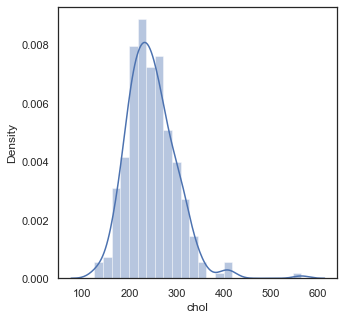

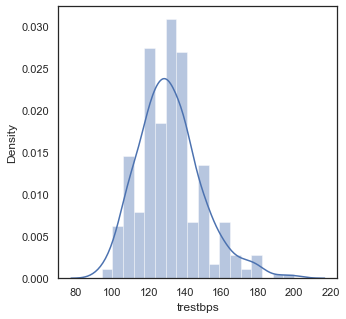

In [56]:
plt.subplots(1,1,figsize=(5,5))
sns.distplot(df["chol"])
plt.subplots(1,1,figsize=(5,5))
sns.distplot(df["trestbps"])

### Split TRAIN and TEST set

In [114]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print('Training data:', train_set.shape)
print('Test data: ', test_set.shape)
train_set_COPY = train_set.copy()
test_set_COPY = test_set.copy()

Training data: (242, 14)
Test data:  (61, 14)


In [145]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),])
num_attributes = list(df.columns)
transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),])
data_prepared = transform_pipeline.fit_transform(df)

In [149]:
data_labels = df['target'].copy()

In [146]:
data_prepared

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

### Training

In [115]:
def evaluate_on_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return accuracy, precision, recall, f1

### Logistic regression

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])
num_attributes = list(df.columns)
transform_pipeline = ColumnTransformer([("num", num_pipeline, num_attributes),])
df_prepared = transform_pipeline.fit_transform(df)
df_prepared

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [117]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [118]:
df_labels = df['target'].copy()

In [119]:
log_reg = LogisticRegression()
log_reg.fit(df_prepared, df_labels)

LogisticRegression()

In [120]:
log_predictions = log_reg.predict(df_prepared)

In [121]:
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(df_labels, log_predictions)

print('LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1)

LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET
Accuracy:  1.0 
Precision:  1.0 
Recall:  1.0 
F1 score:  1.0


### KNN

In [122]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df_prepared, df_labels)

KNeighborsClassifier(n_neighbors=3)

In [123]:
knn_predictions = knn.predict(df_prepared)

In [124]:
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(df_labels, knn_predictions)

print('K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED
Accuracy:  0.9801980198019802 
Precision:  0.9818181818181818 
Recall:  0.9818181818181818 
F1 score:  0.9818181818181818


In [125]:
print ("Confusion matrix:")
print (confusion_matrix(df_labels, knn_predictions))

Confusion matrix:
[[135   3]
 [  3 162]]


### Evaluate on TEST dataset

In [126]:
data_test = test_set.copy()
data_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [131]:
data_test_labels = data_test['target'].copy()

In [128]:
data_test_prepared = transform_pipeline.fit_transform(data_test)
data_test_prepared

array([[ 3.51938054e-01,  5.20416500e-01, -8.17224232e-01,
         6.92350698e-01,  6.70698758e-01, -5.45776823e-01,
        -8.61891607e-01, -1.43822060e+00,  1.28536917e+00,
        -3.99335669e-01, -4.85744493e-01,  7.31507170e-02,
        -2.00597821e+00, -1.05045146e+00],
       [ 5.85288285e-01,  5.20416500e-01,  2.00451227e+00,
         1.72875297e+00,  9.21953360e-01, -5.45776823e-01,
        -8.61891607e-01,  4.50638062e-01, -7.77986605e-01,
        -6.92823330e-01, -4.85744493e-01, -8.19288030e-01,
         9.42568077e-01, -1.05045146e+00],
       [ 3.51938054e-01,  5.20416500e-01,  1.06393343e+00,
         6.92350698e-01, -2.46998376e+00,  1.83225076e+00,
         1.16023870e+00,  1.01327681e+00, -7.77986605e-01,
        -6.92823330e-01,  1.07375098e+00,  7.31507170e-02,
         9.42568077e-01,  9.51971638e-01],
       [ 2.35262938e-01, -1.92153785e+00, -8.17224232e-01,
        -1.36771119e-01,  3.45543726e+00, -5.45776823e-01,
        -8.61891607e-01,  8.89417229e-02,  1.

### Prediction with Logistic Regression

In [132]:
log_predictions = log_reg.predict(data_test_prepared)
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(data_test_labels, log_predictions)
print('LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1)

LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED
Accuracy:  1.0 
Precision:  1.0 
Recall:  1.0 
F1 score:  1.0


### Prediction with KNN

In [133]:
knn_predictions = knn.predict(data_test_prepared)
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(data_test_labels, knn_predictions)
print('K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET
Accuracy:  0.9672131147540983 
Precision:  0.96875 
Recall:  0.96875 
F1 score:  0.96875


In [134]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, knn_predictions))

Confusion matrix:
[[28  1]
 [ 1 31]]


In [153]:
classifier_collection = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

In [154]:
accuracy_score_dict = {}

roc_auc_dict = {}
confusion_matrix_dict = {}

In [155]:
from sklearn.metrics import roc_curve
from sklearn import metrics
count=0
for classifier_model, classifier in (classifier_collection.items()):
    count +=1
    classifier.fit(data_prepared,data_labels)
    predicted = classifier.predict(data_test_prepared)
    confusion_matrix_dict[classifier_model] = {'matrix' : confusion_matrix(data_test_labels, predicted)}
    roc_auc_dict[classifier_model] = {'roc-auc' : metrics.roc_auc_score(data_test_labels, predicted)}

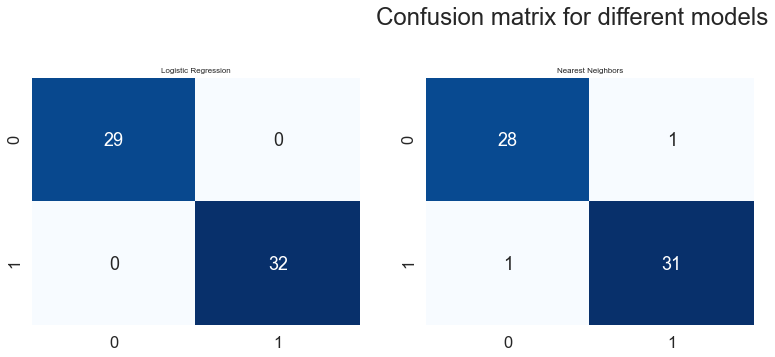

In [156]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion matrix for different models",fontsize=24)
n = 0
for classifier, class_score in confusion_matrix_dict.items():
    for item, score in class_score.items():
        n +=1
        plt.subplot(2, 3, n) 
        plt.title(classifier, fontsize=8)
        sns.heatmap(score,annot=True,cbar=False,cmap="Blues",fmt="d")

(0.0, 1.0)

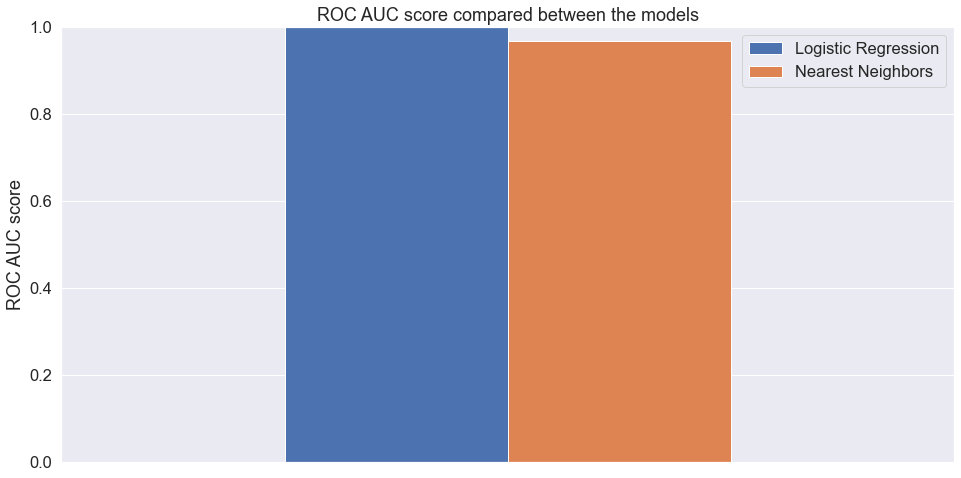

In [159]:
ax = pd.DataFrame(roc_auc_dict).plot(kind='bar', figsize=(16,8), title="ROC AUC score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("ROC AUC score")
ax.set_ylim(0,1)

#### conclusion

#### overall our best performing model is Logistic Regression than KNN